# NodeKernel

In [1]:
from __future__ import print_function
from builtins import range
#================================================================================
#    Marion Neumann [marion dot neumann at uni-bonn dot de]
#    Daniel Marthaler [dan dot marthaler at gmail dot com]
#    Shan Huang [shan dot huang at iais dot fraunhofer dot de]
#    Kristian Kersting [kristian dot kersting at cs dot tu-dortmund dot de]
#
#    This file is part of pyGPs.
#    The software package is released under the BSD 2-Clause (FreeBSD) License.
#
#    Copyright (c) by
#    Marion Neumann, Daniel Marthaler, Shan Huang & Kristian Kersting, 18/02/2014
#================================================================================

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pyGPs
from pyGPs.GraphExtensions import graphUtil, nodeKernels
from pyGPs.Validation import valid


def load_binary(D1,D2,reduce=False):
    data = loadmat('usps_resampled.mat')
    x = data['train_patterns'].T   # train patterns
    y = data['train_labels'].T     # train_labels
    xx = data['test_patterns'].T   # test patterns
    yy = data['test_labels'].T     # test labels
    D1_list = []
    D2_list = []
    n,D = x.shape
    for i in range(n):
        if y[i,D1] == 1:
            D1_list.append(i)
        elif y[i,D2] == 1:
            D2_list.append(i)
    if reduce == True:
        D1_list = D1_list[:100]
        D2_list = D2_list[:100]
    n1 = len(D1_list)
    n2 = len(D2_list)
    x_binary = np.concatenate((x[D1_list,:], x[D2_list,:]))
    y_binary = np.concatenate((np.ones((n1,1)),-np.ones((n2,1))))
    return x_binary,y_binary


def plotDigit(digit, title_str=''):
    fig, ax = plt.subplots()
    ax.imshow(digit, cmap=plt.cm.gray, interpolation='nearest')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.title(title_str)
    plt.show()

In E:\Users\scfan\software\anaconda3_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Users\scfan\software\anaconda3_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Users\scfan\software\anaconda3_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In E:\Users\scfan\software\anaconda3_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Users\scfan\software\anaconda3_new

In [5]:
base_dir=r"E:\Users\scfan\software\pyGPs-master\pyGPs-master\pyGPs\Demo\USPS"
import os
os.chdir(base_dir)

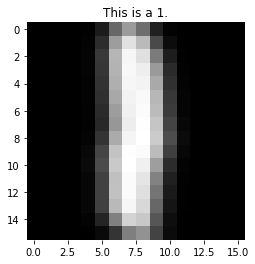

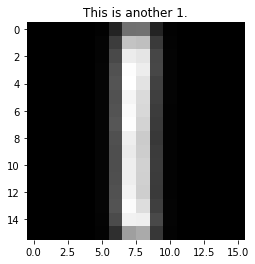

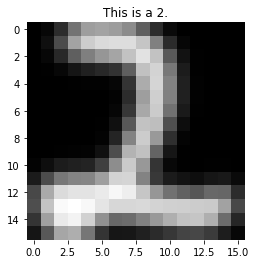

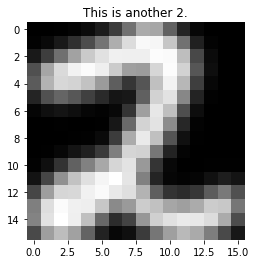

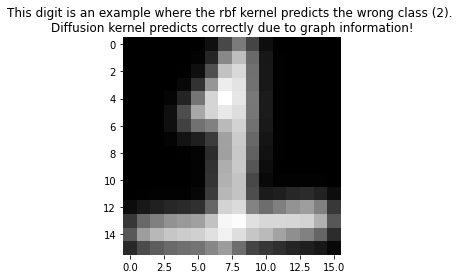

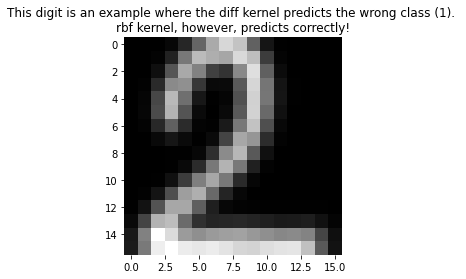

Number of line searches 13


(array([[ 0.99927283],
        [ 0.99757845],
        [-0.98953243],
        [-0.98796898],
        [-0.13153081],
        [-0.92063047]]), array([[0.00145381],
        [0.00483723],
        [0.02082557],
        [0.0239173 ],
        [0.98269965],
        [0.15243954]]), array([[  741.30207519],
        [  505.89004364],
        [-1247.12216226],
        [-1529.92087037],
        [  -77.92974841],
        [ -693.44486065]]), array([[ 48125.2150945 ],
        [ 27820.09870627],
        [237323.216191  ],
        [371161.32819753],
        [221445.51359909],
        [156237.63340965]]), None)

Number of line searches 2


(array([[ 1.99936844e-01],
        [ 3.24154499e-01],
        [-1.90704126e-01],
        [-1.91046841e-01],
        [ 8.80117448e-02],
        [ 1.95325544e-04]]), array([[0.96002526],
        [0.89492386],
        [0.96363194],
        [0.9635011 ],
        [0.99225393],
        [0.99999996]]), array([[ 3.02450384e-01],
        [ 4.48583548e-01],
        [-2.88400026e-01],
        [-2.89113459e-01],
        [ 1.25428584e-01],
        [ 2.91925137e-04]]), array([[0.42612195],
        [0.15092058],
        [0.42807747],
        [0.42990626],
        [0.28772976],
        [0.42201774]]), None)

Number of line searches 6


(array([[ 0.91571425],
        [ 0.92179166],
        [-0.8678491 ],
        [-0.84968405],
        [ 0.11292468],
        [-0.49300581]]), array([[0.16146742],
        [0.15030014],
        [0.24683793],
        [0.27803701],
        [0.98724802],
        [0.75694527]]), array([[ 2.20156338],
        [ 2.00758834],
        [-2.11345802],
        [-2.08790496],
        [ 0.19168499],
        [-0.91421757]]), array([[0.62632858],
        [0.29940042],
        [0.97026835],
        [1.10694017],
        [0.82206231],
        [0.89838444]]), None)

[[ 38.   1.   1.   1.   1.]
 [ 81.   1.   1.   1.   1.]
 [124.  -1.  -1.  -1.  -1.]
 [129.  -1.  -1.  -1.  -1.]
 [ 70.   1.  -1.   1.   1.]
 [190.  -1.  -1.   1.  -1.]]
accuracy (RBF):  0.8333333333333334
accuracy (DIFF):  0.8333333333333334
accuracy (SUM):  1.0


In [6]:
if __name__ == "__main__":
    # load small reduced dataset with 2 classes
    # digit 1 for +1 and digit 2 for -1
    x,y = load_binary(1,2,reduce=True)
  
    # plot example digit
    exampleDigit1_1 = x[38]    # sample digit 1
    exampleDigit1_1 = np.reshape(exampleDigit1_1,(16,16))
    plotDigit(exampleDigit1_1, 'This is a 1.')

    exampleDigit1_2 = x[81]    # another sample digit 1
    exampleDigit1_2 = np.reshape(exampleDigit1_2,(16,16))
    plotDigit(exampleDigit1_2, 'This is another 1.')

    exampleDigit7_1 = x[124]   # sample digit 2
    exampleDigit7_1 = np.reshape(exampleDigit7_1,(16,16))
    plotDigit(exampleDigit7_1, 'This is a 2.')

    exampleDigit7_2 = x[129]   # another sample digit 2
    exampleDigit7_2 = np.reshape(exampleDigit7_2,(16,16))
    plotDigit(exampleDigit7_2, 'This is another 2.')

    # true class 1     
    exampleDigitBad = x[70]    # digit that predicts wrong for rbf
    exampleDigitBad = np.reshape(exampleDigitBad,(16,16))
    plotDigit(exampleDigitBad, 'This digit is an example where the rbf kernel predicts the wrong class (2). \nDiffusion kernel predicts correctly due to graph information!')
    
    # true class 2     
    exampleDigitBad = x[190]    # digit that predicts wrong for diff
    exampleDigitBad = np.reshape(exampleDigitBad,(16,16))
    plotDigit(exampleDigitBad, 'This digit is an example where the diff kernel predicts the wrong class (1). \nrbf kernel, however, predicts correctly!')


    # form a 2-nearest neighbour graph 
    A = graphUtil.formKnnGraph(x,2)

    # use diffusion kernel to get precomputed matrix
    Matrix = nodeKernels.diffKernel(A)
    N = Matrix.shape[0]
    
    # set training and test set
    index_train = range(N)
    index_test = [38, 81, 124, 129, 70, 190]
    index_train =  np.setdiff1d(index_train, index_test)
        
    ## RBF kernel
    # initialize Gaussian process
    model = pyGPs.GPC()
    k = pyGPs.cov.RBF()
    model.setPrior(kernel=k)

    # split training and test data
    x_train = x[index_train,:]
    y_train = y[index_train,:]
    x_test = x[index_test,:]
    y_test = y[index_test,:]
    
    # gp
    model.optimize(x_train, y_train)
    model.predict(x_test)
    
    # evaluation 
    predictive_class_rbf = np.sign(model.ym)
    ACC_rbf = valid.ACC(predictive_class_rbf, y_test)    

    ## DIFFUSION Kernel
    # compute kernel matrix and initalize GP with precomputed kernel                  
    model = pyGPs.GPC()
    M1,M2 = graphUtil.formKernelMatrix(Matrix, index_train, index_test)
    k = pyGPs.cov.Pre(M1,M2)          
    model.setPrior(kernel=k)

    # if you only use precomputed kernel matrix, there is no training data needed,
    # but you still need to specify x_train (due to general structure of pyGPs)
    # e.g. you can use the following:
    n = len(index_train)
    x_train = np.zeros((n,1))

    # gp
    model.optimize(x_train, y_train)
    model.predict(x_test)
    
    # evaluation 
    predictive_class_diff = np.sign(model.ym)
    ACC_diff = valid.ACC(predictive_class_diff, y_test)
    
    ## SUM of DIFFUSION and RBF Kernel
    # compute kernel matrix and initalize GP with precomputed kernel                  
    model = pyGPs.gp.GPC()
    M1,M2 = graphUtil.formKernelMatrix(Matrix, index_train, index_test)
    k = pyGPs.cov.Pre(M1,M2) + pyGPs.cov.RBFunit()
    model.setPrior(kernel=k)

    # if you use combination of precomputed matrix and other kernel function,
    # you can pass traning data in the normal way: x_train = x[index_train,:]
    x_train = x[index_train,:]
    # gp
    model.optimize(x_train, y_train)
    model.predict(x_test)
    
    # evaluation 
    predictive_class_sum = np.sign(model.ym)
    ACC_sum = valid.ACC(predictive_class_sum, y_test)
    
    
    print(np.hstack((np.array(index_test, ndmin=2).T, y_test, predictive_class_rbf, predictive_class_diff, predictive_class_sum)))
    print('accuracy (RBF): ' , ACC_rbf)
    print('accuracy (DIFF): ' , ACC_diff)
    print('accuracy (SUM): ' , ACC_sum)

In [21]:
A
Matrix.shape
index_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(200, 200)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 125, 126, 127, 128, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [26]:
model.ym

array([[ 0.91571425],
       [ 0.92179166],
       [-0.8678491 ],
       [-0.84968405],
       [ 0.11292468],
       [-0.49300581]])

In [10]:
# form a 2-nearest neighbour graph 
A = graphUtil.formKnnGraph(x,2)

# use diffusion kernel to get precomputed matrix
Matrix = nodeKernels.diffKernel(A)
N = Matrix.shape[0]

# set training and test set
index_train = range(N)
index_test = [38, 81, 124, 129, 70, 190]
index_train =  np.setdiff1d(index_train, index_test)

## RBF kernel
# initialize Gaussian process
model = pyGPs.GPC()
k = pyGPs.cov.RBF()
model.setPrior(kernel=k)

# split training and test data
x_train = x[index_train,:]
y_train = y[index_train,:]
x_test = x[index_test,:]
y_test = y[index_test,:]

# gp
model.optimize(x_train, y_train)
model.predict(x_test)

# evaluation 
predictive_class_rbf = np.sign(model.ym)
ACC_rbf = valid.ACC(predictive_class_rbf, y_test)    

## DIFFUSION Kernel
# compute kernel matrix and initalize GP with precomputed kernel                  
model = pyGPs.GPC()
M1,M2 = graphUtil.formKernelMatrix(Matrix, index_train, index_test)
k = pyGPs.cov.Pre(M1,M2)          
model.setPrior(kernel=k)

# if you only use precomputed kernel matrix, there is no training data needed,
# but you still need to specify x_train (due to general structure of pyGPs)
# e.g. you can use the following:
n = len(index_train)
x_train = np.zeros((n,1))

# gp
model.optimize(x_train, y_train)
model.predict(x_test)

# evaluation 
predictive_class_diff = np.sign(model.ym)
ACC_diff = valid.ACC(predictive_class_diff, y_test)

## SUM of DIFFUSION and RBF Kernel
# compute kernel matrix and initalize GP with precomputed kernel                  
model = pyGPs.gp.GPC()
M1,M2 = graphUtil.formKernelMatrix(Matrix, index_train, index_test)
k = pyGPs.cov.Pre(M1,M2) + pyGPs.cov.RBFunit()
model.setPrior(kernel=k)

# if you use combination of precomputed matrix and other kernel function,
# you can pass traning data in the normal way: x_train = x[index_train,:]
x_train = x[index_train,:]
# gp
model.optimize(x_train, y_train)
model.predict(x_test)

# evaluation 
predictive_class_sum = np.sign(model.ym)
ACC_sum = valid.ACC(predictive_class_sum, y_test)


print(np.hstack((np.array(index_test, ndmin=2).T, y_test, predictive_class_rbf, predictive_class_diff, predictive_class_sum)))
print('accuracy (RBF): ' , ACC_rbf)
print('accuracy (DIFF): ' , ACC_diff)
print('accuracy (SUM): ' , ACC_sum)

Number of line searches 13


(array([[ 0.99927283],
        [ 0.99757845],
        [-0.98953243],
        [-0.98796898],
        [-0.13153081],
        [-0.92063047]]), array([[0.00145381],
        [0.00483723],
        [0.02082557],
        [0.0239173 ],
        [0.98269965],
        [0.15243954]]), array([[  741.30207519],
        [  505.89004364],
        [-1247.12216226],
        [-1529.92087037],
        [  -77.92974841],
        [ -693.44486065]]), array([[ 48125.2150945 ],
        [ 27820.09870627],
        [237323.216191  ],
        [371161.32819753],
        [221445.51359909],
        [156237.63340965]]), None)

Number of line searches 2


(array([[ 1.99936844e-01],
        [ 3.24154499e-01],
        [-1.90704126e-01],
        [-1.91046841e-01],
        [ 8.80117448e-02],
        [ 1.95325544e-04]]), array([[0.96002526],
        [0.89492386],
        [0.96363194],
        [0.9635011 ],
        [0.99225393],
        [0.99999996]]), array([[ 3.02450384e-01],
        [ 4.48583548e-01],
        [-2.88400026e-01],
        [-2.89113459e-01],
        [ 1.25428584e-01],
        [ 2.91925137e-04]]), array([[0.42612195],
        [0.15092058],
        [0.42807747],
        [0.42990626],
        [0.28772976],
        [0.42201774]]), None)

Number of line searches 6


(array([[ 0.91571425],
        [ 0.92179166],
        [-0.8678491 ],
        [-0.84968405],
        [ 0.11292468],
        [-0.49300581]]), array([[0.16146742],
        [0.15030014],
        [0.24683793],
        [0.27803701],
        [0.98724802],
        [0.75694527]]), array([[ 2.20156338],
        [ 2.00758834],
        [-2.11345802],
        [-2.08790496],
        [ 0.19168499],
        [-0.91421757]]), array([[0.62632858],
        [0.29940042],
        [0.97026835],
        [1.10694017],
        [0.82206231],
        [0.89838444]]), None)

[[ 38.   1.   1.   1.   1.]
 [ 81.   1.   1.   1.   1.]
 [124.  -1.  -1.  -1.  -1.]
 [129.  -1.  -1.  -1.  -1.]
 [ 70.   1.  -1.   1.   1.]
 [190.  -1.  -1.   1.  -1.]]
accuracy (RBF):  0.8333333333333334
accuracy (DIFF):  0.8333333333333334
accuracy (SUM):  1.0


# 